In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickzel/flight-delay-and-cancellation-dataset-2019-2023")

print("Path to dataset files:", path)

c:\Users\eliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 140M/140M [01:00<00:00, 2.42MB/s] 

Extracting files...


Path to dataset files: C:\Users\eliza\.cache\kagglehub\datasets\patrickzel\flight-delay-and-cancellation-dataset-2019-2023\versions\7


In [48]:
data = pd.read_csv(r'c:\Users\eliza\.cache\kagglehub\datasets\patrickzel\flight-delay-and-cancellation-dataset-2019-2023\versions\7\flights_sample_3m.csv')

In [27]:
data.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [50]:
data.drop(['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'ELAPSED_TIME', 'DEP_TIME', 'ARR_TIME',
           'AIRLINE', 'AIRLINE_DOT', 'ORIGIN_CITY', 'DEST_CITY', 'WHEELS_ON', 'WHEELS_OFF', 'AIR_TIME','DELAY_DUE_LATE_AIRCRAFT'], axis=1, inplace=True)

In [51]:
numeric_data = data.select_dtypes(['float64', 'int64'])

In [52]:
numeric_data.drop(['DOT_CODE', 'FL_NUMBER', 'CANCELLED', 'DIVERTED'], axis=1, inplace=True)

<Axes: ylabel='ARR_DELAY'>

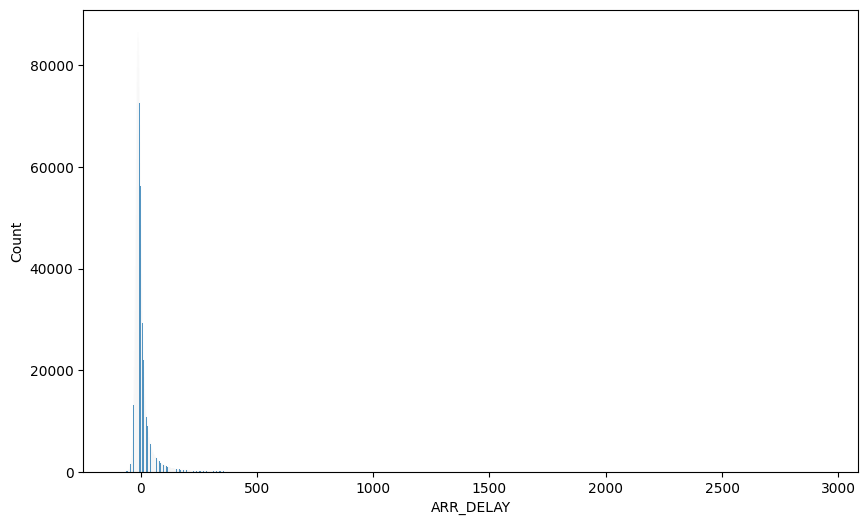

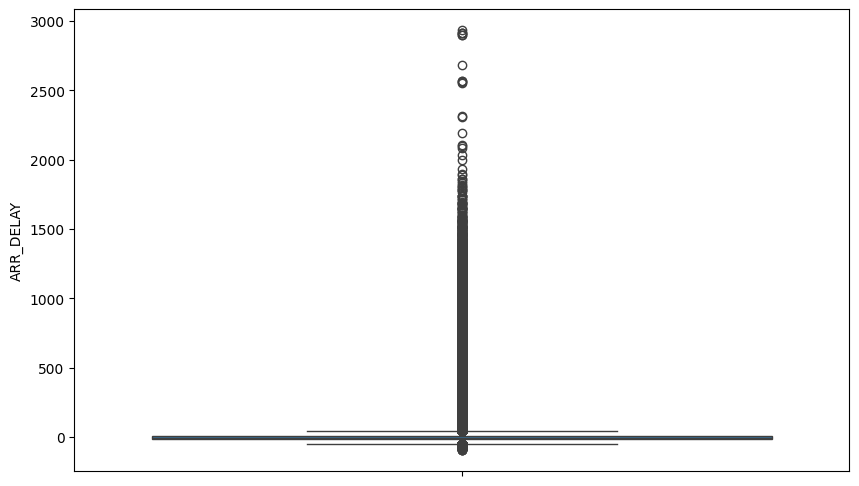

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(numeric_data['ARR_DELAY'])

plt.figure(figsize=(10, 6))
sns.boxplot(numeric_data['ARR_DELAY'])

In [21]:
data['ARR_DELAY'].describe()

count    2.913802e+06
mean     4.260858e+00
std      5.117482e+01
min     -9.600000e+01
25%     -1.600000e+01
50%     -7.000000e+00
75%      7.000000e+00
max      2.934000e+03
Name: ARR_DELAY, dtype: float64

<Axes: >

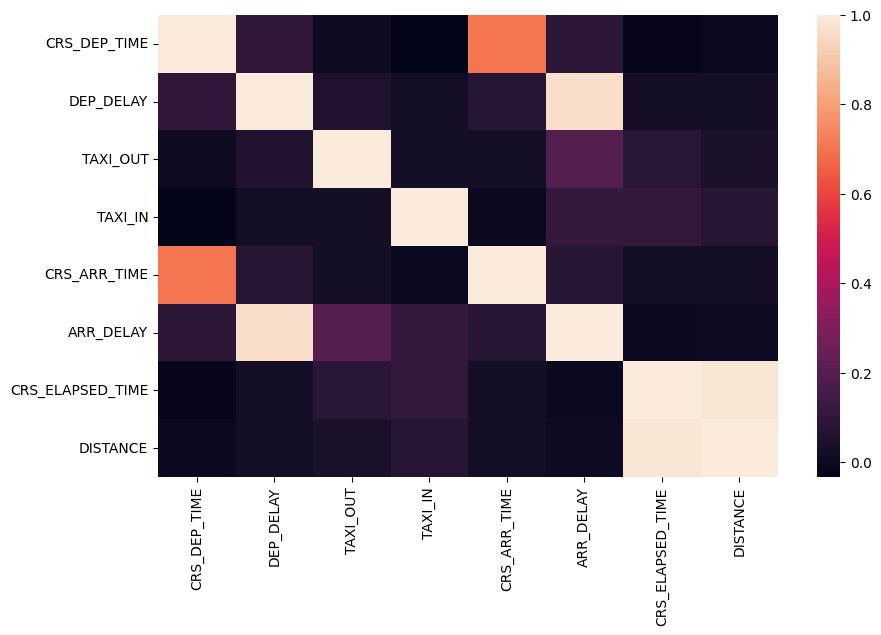

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr())

In [ ]:
data.drop(['ELAPSED_TIME', 'AIR_TIME', 'ARR_TIME', 'DEP_TIME'], axis=1, inplace=True)
numeric_data.drop(['ELAPSED_TIME', 'AIR_TIME', 'ARR_TIME', 'DEP_TIME'], axis=1, inplace=True)

In [54]:
Cancelled = data[data['CANCELLED'] == 1]
data = data[data['CANCELLED'] == 0]